# Audio Processing

In this livecode we will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates.

In [1]:
!pip install scipy --quiet


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/mic_recording_original.png" width=1000>

In [3]:
R = 44100 # Sampling rate
D = 3     # Duration of the sound

❓ Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants).

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [4]:
# R = 440 # Sampling rate
D = 3
def note(f):
    t = np.linspace(0,D,R * D)
    return np.sin(2*np.pi*f*t)

array([ 0.00000000e+00,  4.74923114e-05,  9.49846227e-05, ...,
       -9.49848042e-05, -4.74923692e-05, -5.03950964e-11])

In [13]:
y = note(440)
t = np.linspace(0,D,R * D)

❓ Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

In [16]:
y.shape

(132300,)

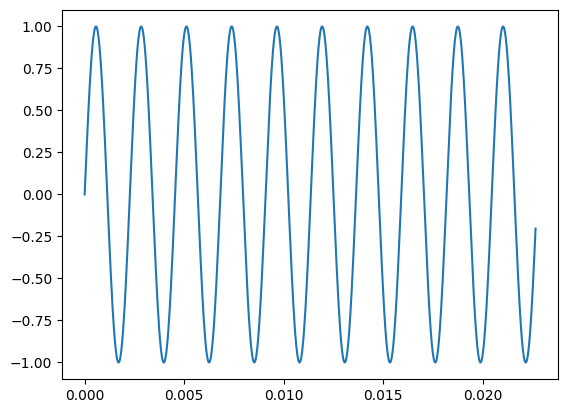

In [18]:
plt.plot(t[:1000], y[:1000])

In [19]:
framerate = 44100
# t = np.linspace(0,5,framerate*5)
# data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t))
Audio(y,rate=framerate)

❓ Call the `note` function to generate an `A` (440 Hz) from the diapason. Play it.

<details>
    <summary>💡 <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

In [21]:
Audio(perfect_fifth,rate=framerate)

In [23]:
Audio(minor_third,rate=framerate)

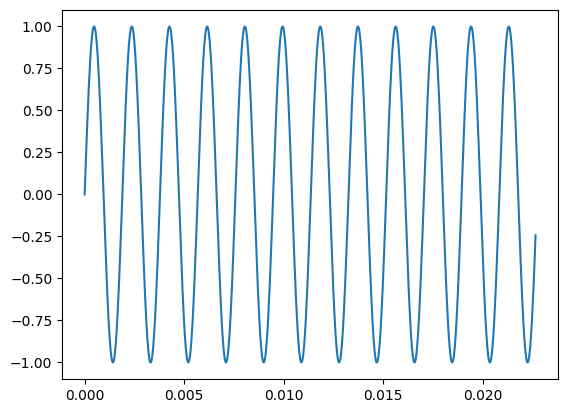

In [22]:
minor_third = note(440 * 6 / 5)
plt.plot(t[:1000], minor_third[:1000])

In [27]:
octave = note(440 * 2 / 1)

In [31]:
lower_a = note(220)

In [32]:
c = perfect_fifth + y

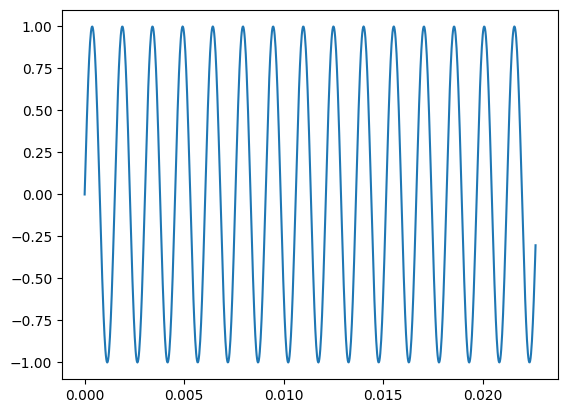

In [20]:
# y = note(440)
perfect_fifth = note(440 * 3 / 2)
plt.plot(t[:1000], perfect_fifth[:1000])

In [33]:
chord = lower_a + c

In [34]:
Audio(chord,rate=framerate)

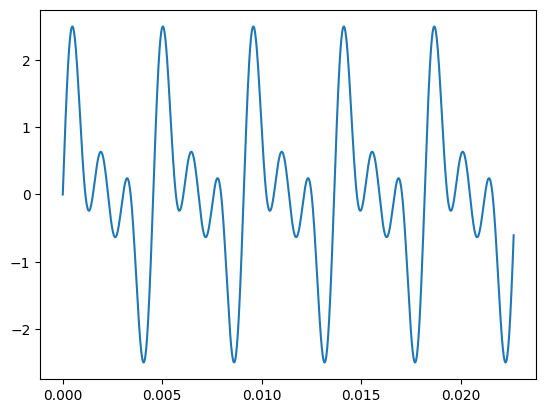

In [35]:
plt.plot(t[:1000], chord[:1000])

❓ Try and layer several notes, like `A` + the perfect fifth, major (or minor) third, etc into a `chord` variable. Play it!

<details>
    <summary>💡 <strong>Hint</strong></summary>
    
Check out the [Frequency Ratio](https://en.wikipedia.org/wiki/Interval_(music)#Frequency_ratios) on Wikipedia. For instance, the perfect fifth has a $\frac{3}{2}$ ratio
</details>

In [ ]:
# YOUR CODE HERE

❓ Plot the first `1000` samples of the chord

In [ ]:
# YOUR CODE HERE

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

<img src="https://wagon-public-datasets.s3.amazonaws.com/03-Maths/01-Algebra-Calculus/fourier_transformation.png" width=550>

Let's use [`scipy.fft`](https://docs.scipy.org/doc/scipy/tutorial/fft.html) to analyze the signals we built above.

Run the following code. Change the `chord` above, and replot it. What do you see?

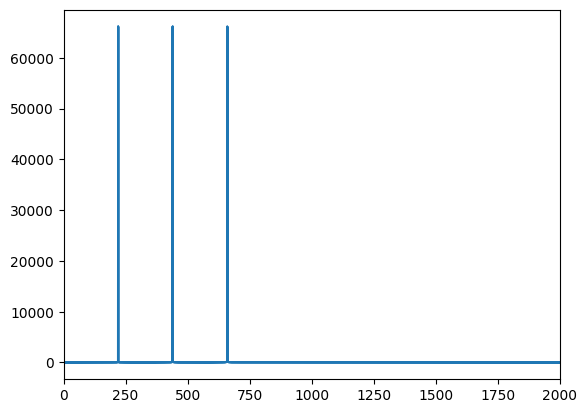

In [36]:
import scipy.fft

def plot_fft(signal, rate, freq_max):
    Y = np.abs(scipy.fft.fft(signal))
    X = np.abs(scipy.fft.fftfreq(Y.size) * rate)
    plt.xlim(0, freq_max)
    plt.plot(X, Y)
    
plot_fft(chord, R, 2000)

## Real-life samples

Let's perform `fft` on the `.wav` files in the folder:

In [54]:
!ls -lh *.wav

-rw-r--r--  1 jinru  staff   505K Jul 27  2022 bird.wav
-rw-r--r--  1 jinru  staff   379K Jul 27  2022 blissful_bell.wav
-rw-r--r--@ 1 jinru  staff   400K Jul 20 18:13 guitar_G.wav
-rw-r--r--  1 jinru  staff   265K Jul 27  2022 piano_F.wav
-rw-r--r--  1 jinru  staff   100K Jul 27  2022 snare_80s.wav


Let's load the audio of `bird.wav` and visualize the sound **waveform**

In [57]:
rate, audio = wavfile.read("bird.wav")
audio.T[0][R:(R+10)]

array([-396, -616, -699, -663, -531, -339, -138,   25,  126,  166],
      dtype=int16)

In [43]:
audio.T[0][R:(R+1000)]

array([ -396,  -616,  -699,  -663,  -531,  -339,  -138,    25,   126,
         166,   154,   111,    67,    36,    17,    16,    39,    79,
         114,   131,   135,   122,    84,    30,   -25,   -73,  -118,
        -153,  -169,  -167,  -148,  -115,   -74,   -41,   -21,    -1,
          25,    60,   102,   152,   207,   247,   252,   203,    95,
         -51,  -200,  -327,  -409,  -410,  -305,  -112,   119,   339,
         514,   600,   563,   402,   157,  -119,  -381,  -583,  -689,
        -689,  -594,  -426,  -207,    26,   239,   412,   539,   606,
         603,   536,   417,   253,    55,  -146,  -311,  -419,  -465,
        -444,  -354,  -217,   -66,    70,   170,   218,   210,   163,
          96,    11,   -85,  -172,  -238,  -282,  -301,  -275,  -192,
         -54,   130,   346,   566,   742,   825,   788,   632,   377,
          53,  -301,  -626,  -862,  -972,  -963,  -855,  -669,  -438,
        -209,   -10,   164,   319,   446,   550,   638,   702,   721,
         681,   582,

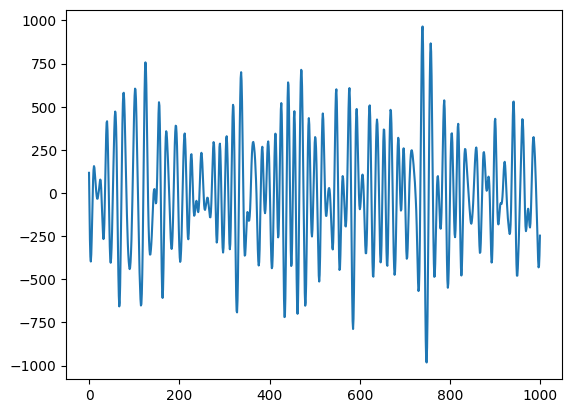

In [45]:
plt.plot(audio.T[1][R:(R+1000)])

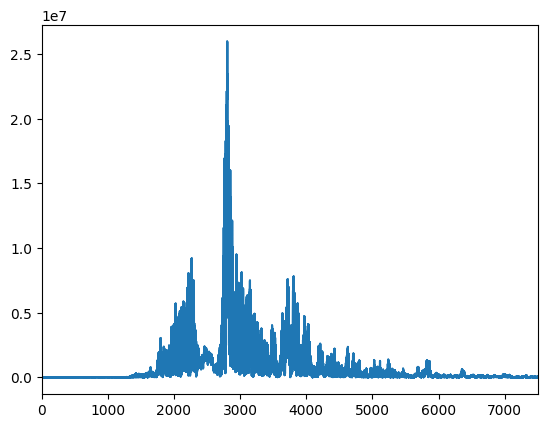

In [58]:
# rate, audio = wavfile.read("snare_80s.wav")
# plt.plot(audio.T[0])
plot_fft(audio.T[0], rate, 7500)

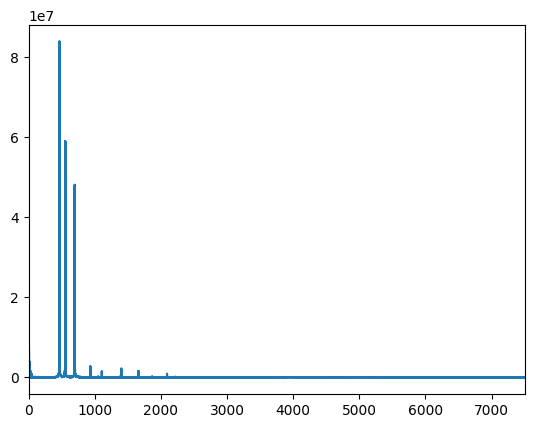

In [47]:
rate, audio = wavfile.read("blissful_bell.wav")
plot_fft(audio.T[0], rate, 7500)

Now let's apply and plot the FFT of that signal & play it

In [ ]:
rate, audio = wavfile.read("bird.wav")
plt.plot(audio.T[0])

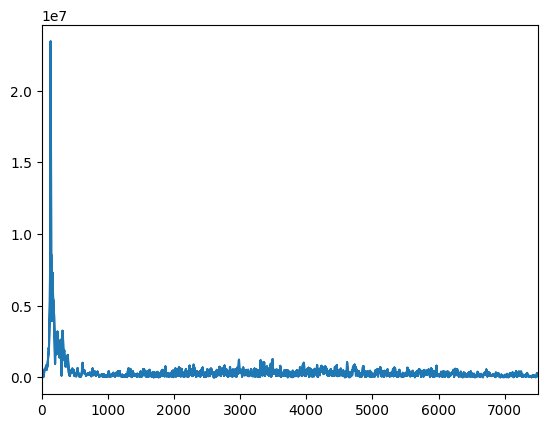

In [53]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

---

Awesome! 

❓ Now it's your turn: try to reproduce that analysis with the other sounds (cf `!ls -lh *.wav` cell above)